<a href="https://colab.research.google.com/github/kavyaagarwal178/image_watermark/blob/main/watermarking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**image watermark**

In [ ]:
#import neccessary libraries
import cv2
import numpy as np
import requests
from PIL import Image



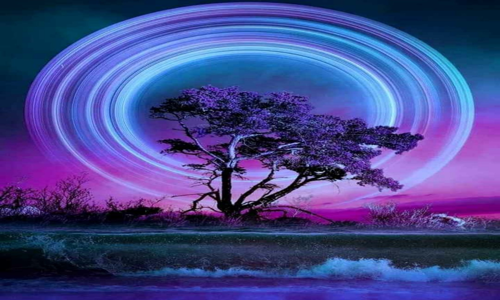

In [ ]:
image = Image.open(requests.get("https://1.bp.blogspot.com/-7dVEfo-4z5w/YMi1T2TCzMI/AAAAAAAABoQ/lXMdAU8tAt0dJl4lUArP8ENfsob3Te62QCLcBGAsYHQ/s1335/IMG_20210615_171007.jpg",stream=True).raw)
image_logow = image.resize((500,300))
image_textw = image.resize((500,300))
image_logow


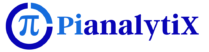

In [ ]:
# Reading logo form url
logo = Image.open(requests.get('https://pianalytix.com/wp-content/uploads/2020/05/cropped-pianalytiX-full-logo-square-2-209x52.png', stream=True).raw)
logo

In [ ]:
image_logow = np.array(image_logow.convert('RGB'))
h_image, w_image, _ = image_logow.shape
logo = np.array(logo.convert('RGB'))
h_logo, w_logo, _ = logo.shape

In [ ]:
# Get the center of the original. It's the location where we will place the watermark
center_y = int(h_image / 2)
center_x = int(w_image / 2)
top_y = center_y - int(h_logo / 2)
left_x = center_x - int(w_logo / 2)
bottom_y = top_y + h_logo
right_x = left_x + w_logo

In [ ]:
# Get ROI
roi = image_logow[top_y: bottom_y, left_x: right_x]
# Add the Logo to the Roi
result = cv2.addWeighted(roi, 1, logo, 1, 0)
# Drawing
cv2.line(image_logow, (0, center_y), (left_x, center_y), (0, 0, 255), 1)
cv2.line(image_logow, (right_x, center_y), (w_image, center_y), (0, 0, 255), 1)
# Replace the ROI on the image
image_logow[top_y: bottom_y, left_x: right_x] = result

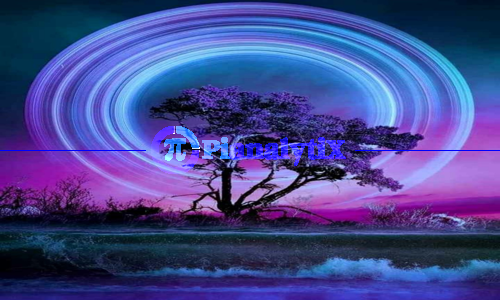

In [ ]:
# Ploting logo watermark image
img = Image.fromarray(image_logow, 'RGB')
img

In [ ]:
# Text Watermark
image_text = np.array(image_textw.convert('RGB'))
cv2.putText(image_text, text='Pianalytix', org=(w_image - 95, h_image - 10), fontFace=cv2.FONT_HERSHEY_COMPLEX, fontScale=0.5,
            color=(0,0,255), thickness=2, lineType=cv2.LINE_4);

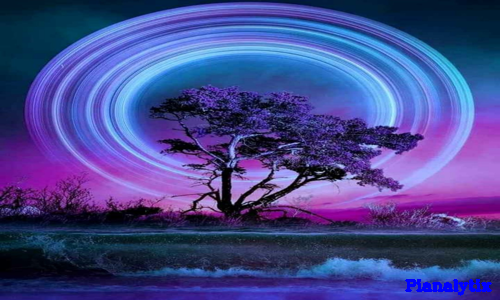

In [ ]:
# Plotting text watermark image
timg = Image.fromarray(image_text, 'RGB')
timg